In [195]:
import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns

In [196]:
data = pd.DataFrame(pd.read_csv('D:\Projects\Machine Learning\CSVs\Housing.csv'))

In [197]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [198]:
data.shape

(545, 13)

In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [200]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [201]:
data.isnull().sum()*100/data.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

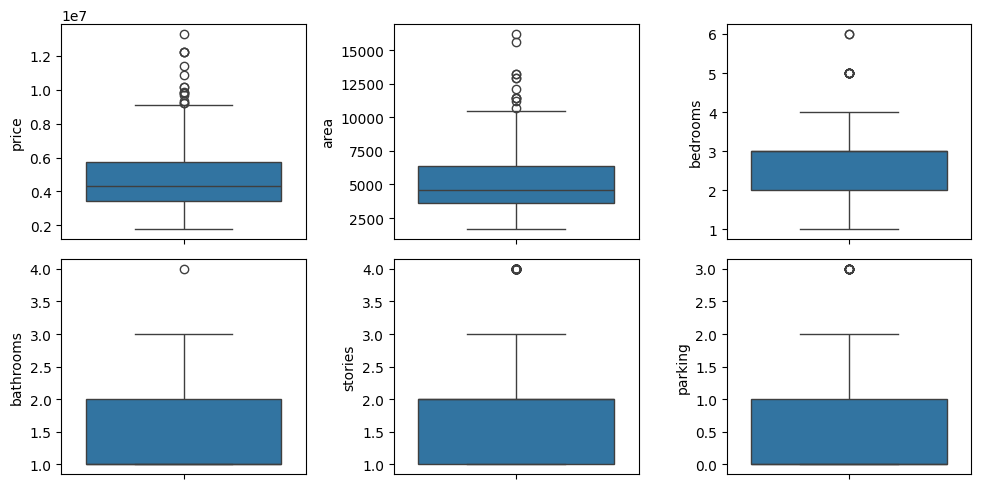

In [202]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5)) #plt.subplots(nrows, ncols, figsize=(width, height))
plt1 = sns.boxplot(data['price'], ax = axs[0,0])
plt2 = sns.boxplot(data['area'], ax = axs[0,1])
plt3 = sns.boxplot(data['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(data['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(data['stories'], ax = axs[1,1])
plt3 = sns.boxplot(data['parking'], ax = axs[1,2])
plt.tight_layout()

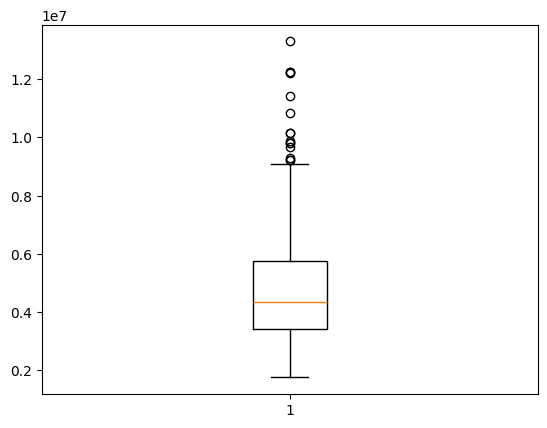

In [203]:
# outlier treatment for price
plt.boxplot(data.price)
Q1 = data.price.quantile(0.25)
Q3 = data.price.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.price >= Q1 - 1.5*IQR) & (data.price <= Q3 + 1.5*IQR)]

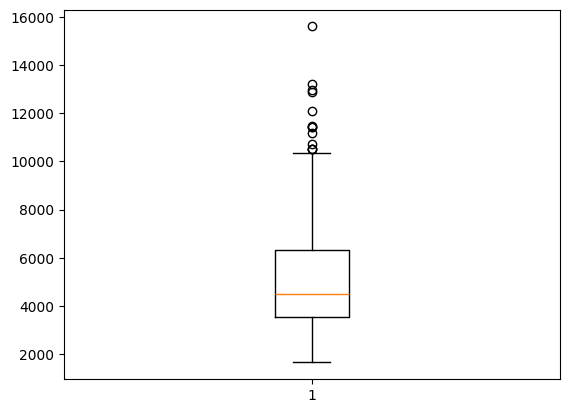

In [204]:
# outlier treatment for area
plt.boxplot(data.area)
Q1 = data.area.quantile(0.25)
Q3 = data.area.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.area >= Q1 - 1.5*IQR) & (data.area <= Q3 + 1.5*IQR)]

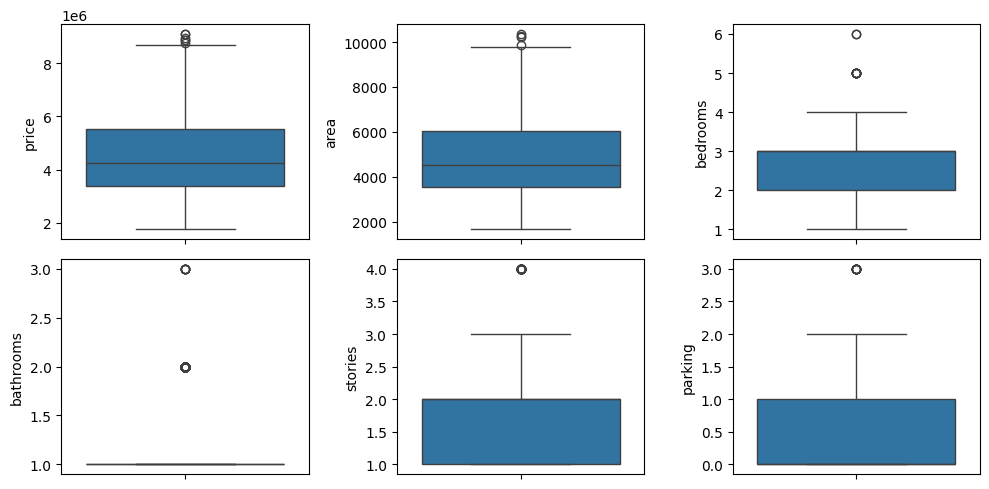

In [205]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(data['price'], ax = axs[0,0])
plt2 = sns.boxplot(data['area'], ax = axs[0,1])
plt3 = sns.boxplot(data['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(data['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(data['stories'], ax = axs[1,1])
plt3 = sns.boxplot(data['parking'], ax = axs[1,2])

plt.tight_layout()

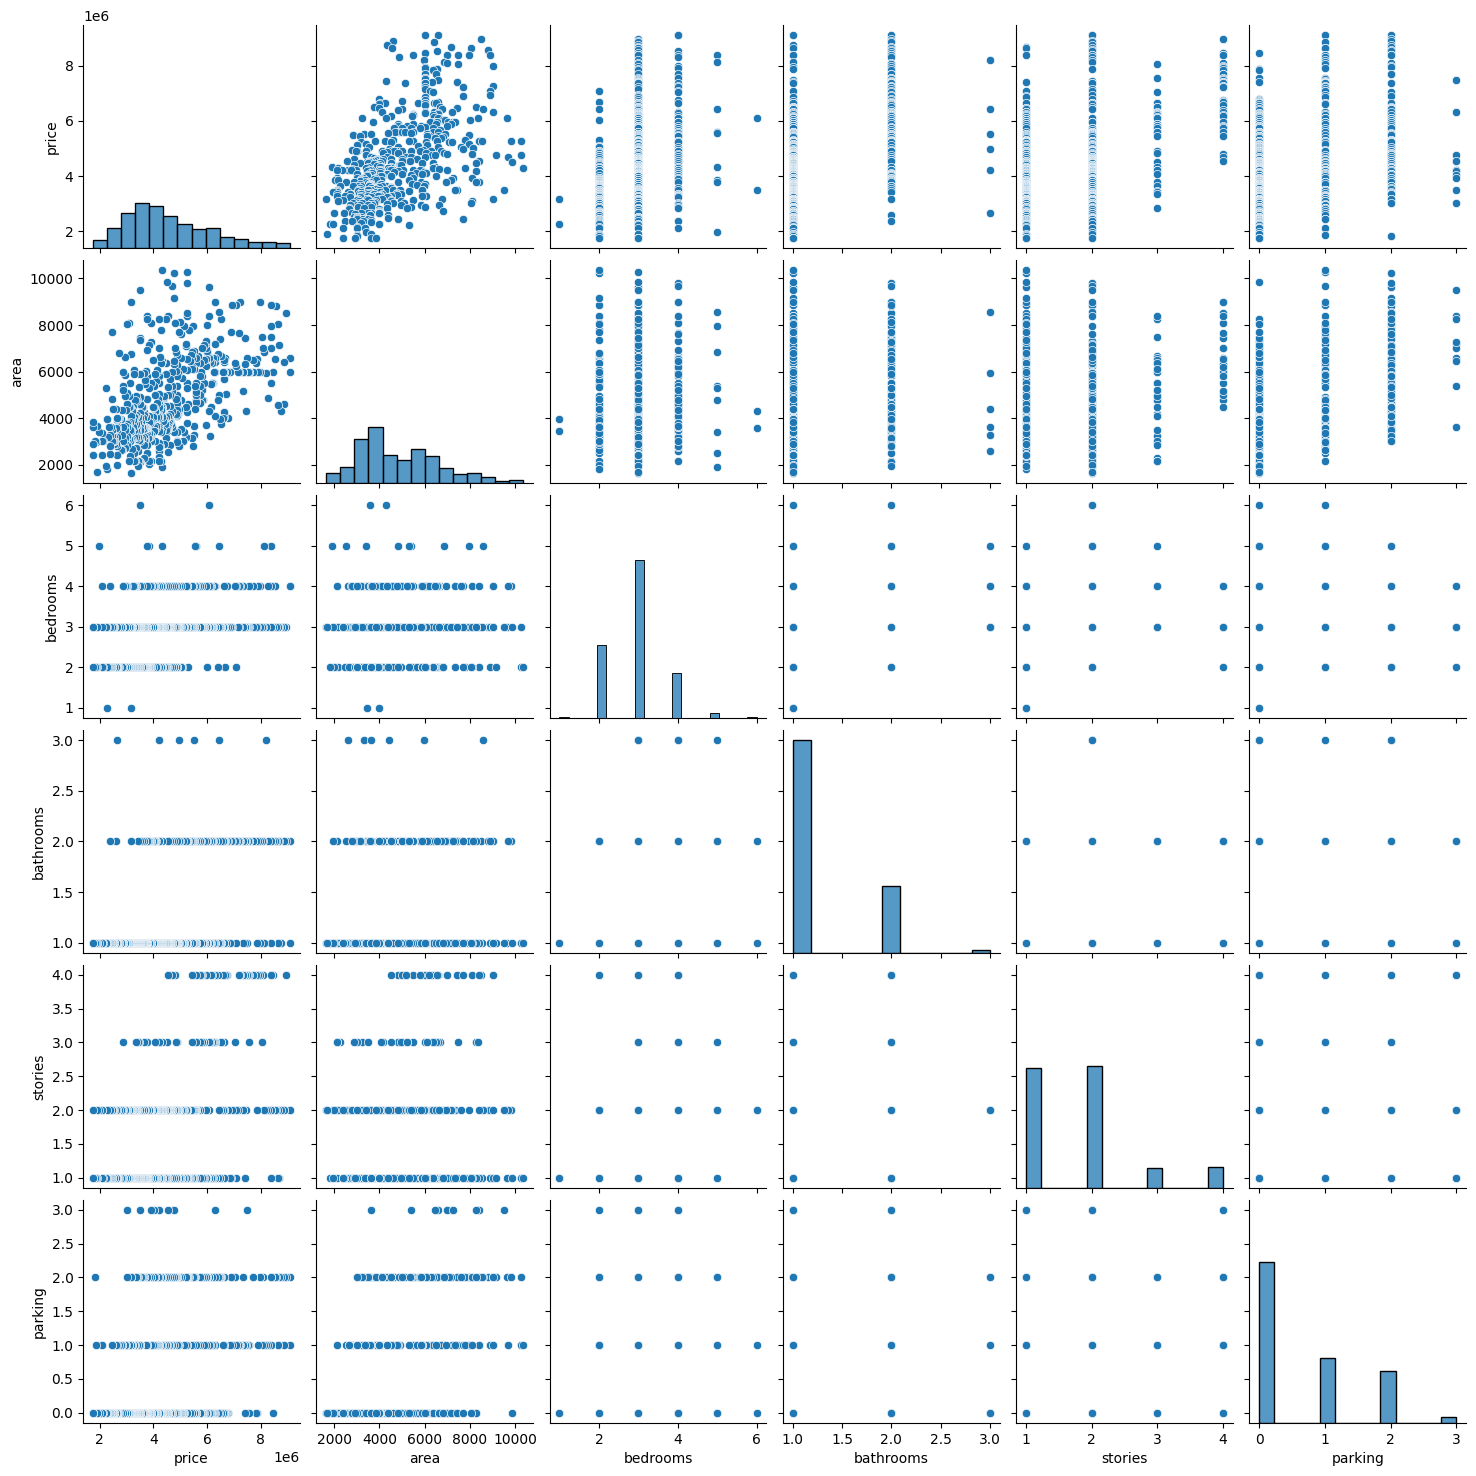

In [206]:
sns.pairplot(data)
plt.show()

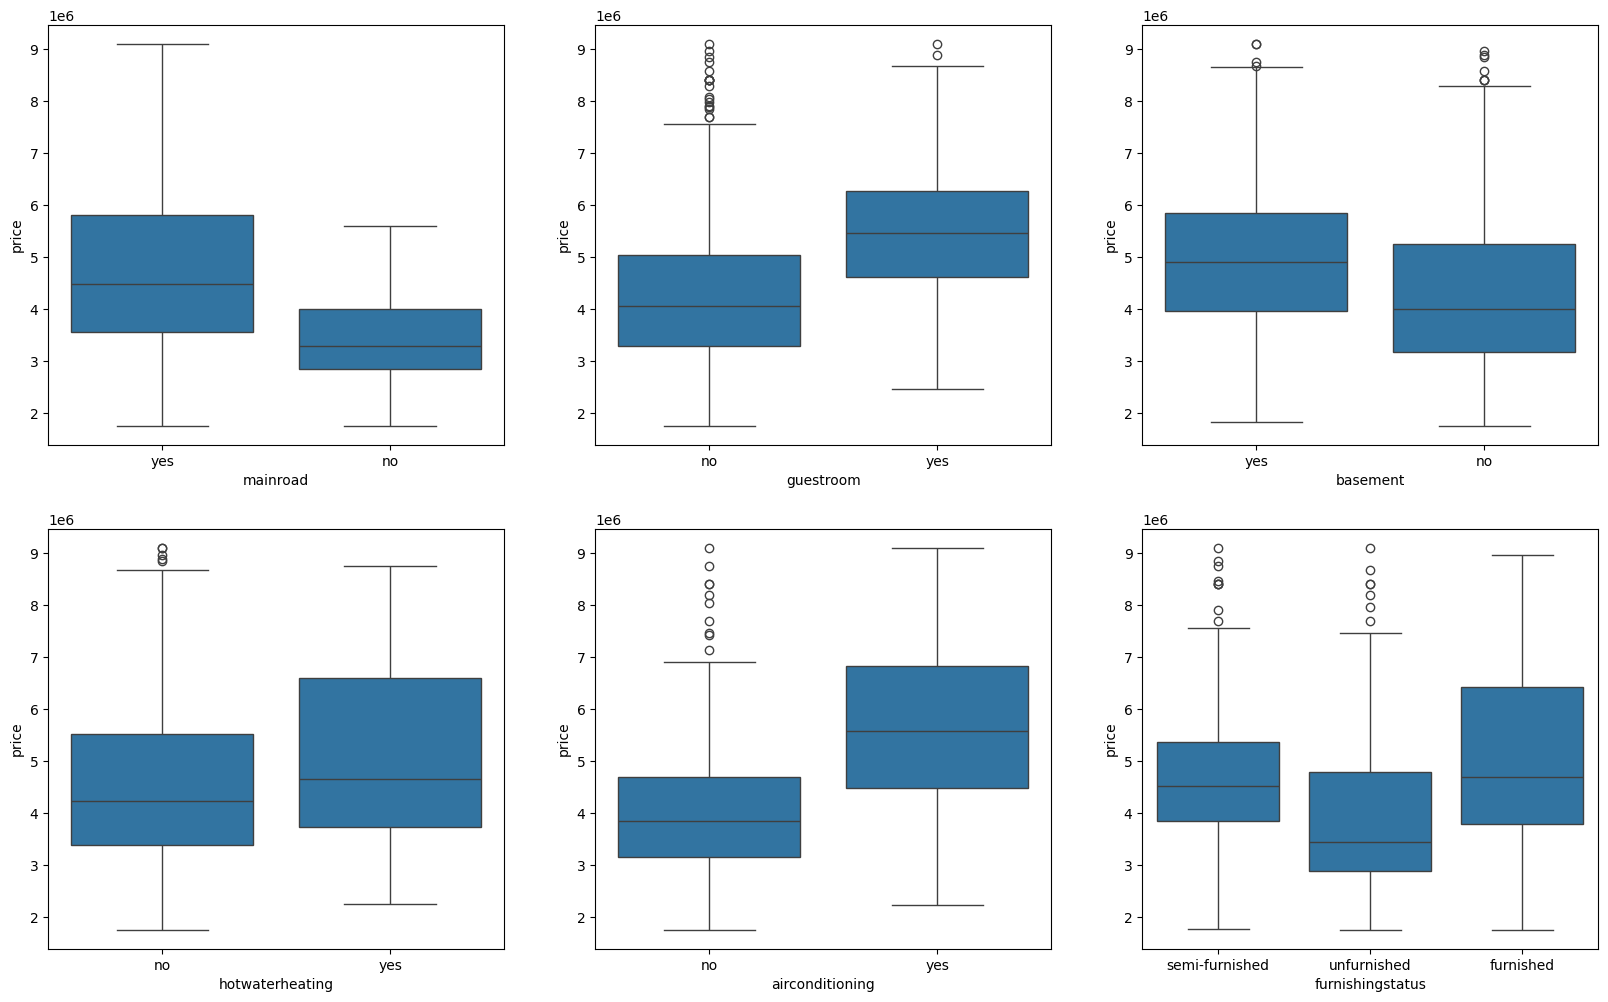

In [207]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = data)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = data)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = data)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = data)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = data)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = data)
plt.show()

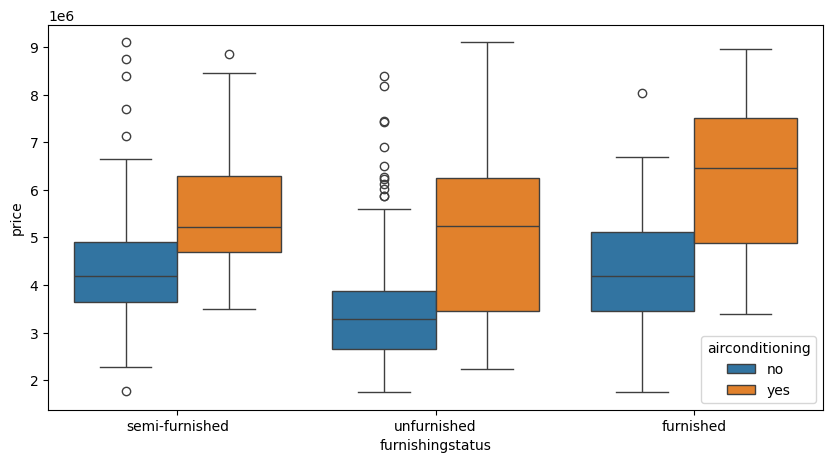

In [208]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = data)
plt.show()

In [209]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the data list
data[varlist] = data[varlist].apply(binary_map)

In [210]:
data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


In [211]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
status = pd.get_dummies(data['furnishingstatus'])


In [212]:
status = pd.get_dummies(data['furnishingstatus'], dtype=int)


In [213]:
# Check what the dataset 'status' looks like
status.head()

,furnished,semi-furnished,unfurnished
15,0,1,0
16,0,0,1
17,1,0,0
18,1,0,0
19,0,1,0


In [214]:
# Let's drop the first column from status df using 'drop_first = True'

status = pd.get_dummies(data['furnishingstatus'], drop_first = True,dtype=int)


In [215]:
# Add the results to the original data dataframe

data = pd.concat([data, status], axis = 1)

In [216]:
# Now let's see the head of our dataframe.

data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,1,0


In [217]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [218]:
from sklearn.preprocessing import MinMaxScaler

In [219]:
scaler = MinMaxScaler()

In [220]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [221]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
148,0.523810,0.526907,0.4,0.0,0.666667,1,0,0,0,0,0.000000,1,semi-furnished,1,0
236,0.390476,0.114134,0.2,0.0,0.333333,1,1,1,0,0,0.000000,1,semi-furnished,1,0
356,0.275238,0.072738,0.8,0.5,0.000000,0,0,1,0,1,0.333333,0,furnished,0,0
425,0.219048,0.151390,0.2,0.0,0.000000,1,0,1,0,0,0.666667,0,furnished,0,0
516,0.095238,0.157895,0.2,0.0,0.000000,0,1,0,0,0,0.333333,0,unfurnished,0,1


In [222]:
df_train.describe()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,0.383701,0.350081,0.390582,0.127424,0.268698,0.875346,0.168975,0.349030,0.038781,0.313019,0.218837,0.207756,0.476454,0.304709
std,0.209712,0.207184,0.149146,0.224465,0.287833,0.330784,0.375250,0.477325,0.193341,0.464366,0.287286,0.406264,0.500138,0.460923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.237143,0.189829,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.338095,0.295092,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.514286,0.491425,0.400000,0.000000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [223]:
print(data.select_dtypes(include=['object']).columns)


Index(['furnishingstatus'], dtype='object')


In [224]:
plt.figure(figsize=(16, 10))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()


ValueError: could not convert string to float: 'semi-furnished'

<Figure size 1600x1000 with 0 Axes>

In [225]:
y_train = df_train.pop('price')
X_train = df_train

### Model Building

In [226]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [227]:
# Split data again
X = data.drop('price', axis=1)
y = data['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

In [ ]:
rfe = RFE(estimator=lm, n_features_to_select=6)               # running RFE
rfe = rfe.fit(X_train, y_train)

In [229]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', False, 10),
 ('bedrooms', False, 6),
 ('bathrooms', True, 1),
 ('stories', False, 2),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', False, 5),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', False, 3),
 ('prefarea', True, 1),
 ('furnishingstatus', False, 9),
 ('semi-furnished', False, 7),
 ('unfurnished', False, 8)]

In [ ]:
col = X_train.columns[rfe.support_]
col

IndexError: boolean index did not match indexed array along dimension 0; dimension is 14 but corresponding boolean dimension is 15

In [ ]:
X_train.columns[~rfe.support_] # ~ means inverse that is ogical not True ↔ False
#This selects features that were NOT picked by RFE.

Index(['area', 'bedrooms', 'stories', 'basement', 'parking', 'semi-furnished',
       'unfurnished', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [ ]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [ ]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
# Add a constant column (also called "intercept") to your feature set.
# It adds a new column full of 1s to your X_train_rfe dataframe.

In [ ]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#ols STANDS FOR Ordinary Least Squares REGRESSION


In [ ]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     54.89
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           1.04e-47
Time:                        10:54:00   Log-Likelihood:                -5535.1
No. Observations:                 361   AIC:                         1.108e+04
Df Residuals:                     354   BIC:                         1.111e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             1.65e+06   2.24e+05     

In [ ]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor
# variance_inflation_factor is a function that calculates the VIF for each feature in a linear regression model.
# #VIF is a measure of how much the variance of an estimated regression coefficient is increased because of collinearity.
# #in simple words VIF Measures how much a feature is correlated with others.


# You imported variance_inflation_factor to check if your input features are overlapping each other too much and to improve your model stability.

In [ ]:
vif = pd.DataFrame()
X = X_train_rfe #Creates an empty DataFrame.
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)#Rounds the VIF values to 2 decimal places for better readability.
vif = vif.sort_values(by = "VIF", ascending = False)
vif

#You built a table that tells you which features are "overlapping" with others — so you can clean up and make your model strong.

,Features,VIF
0,const,14.62
1,bathrooms,1.05
2,mainroad,1.05
5,airconditioning,1.05
6,prefarea,1.05
3,guestroom,1.04
4,hotwaterheating,1.02


Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [ ]:
y_train_price = lm.predict(X_train_rfe)

In [ ]:
res = (y_train_price - y_train)

In [ ]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\aryan.katoch\AppData\Local\Temp\ipykernel_17056\2685412076.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_price), bins = 20)


Text(0.5, 0, 'Errors')

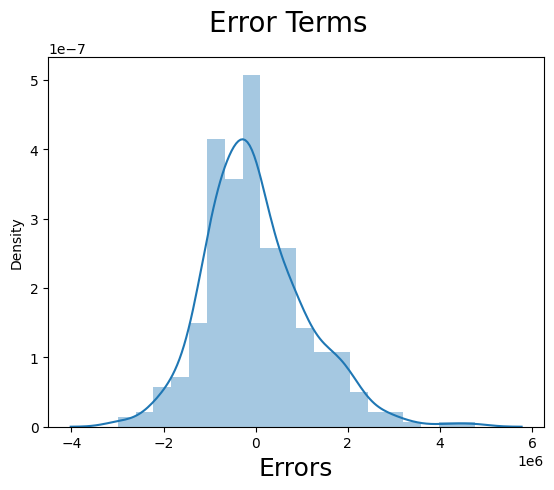

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

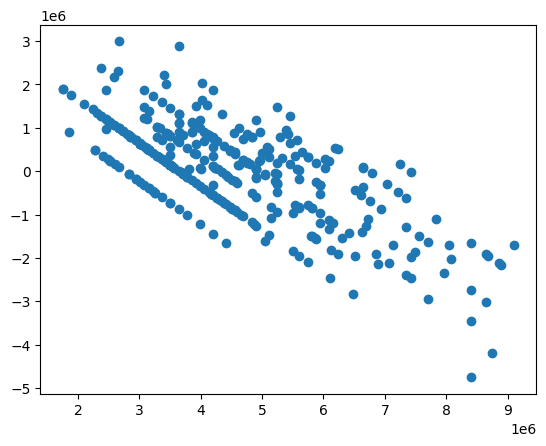

In [ ]:
plt.scatter(y_train,res)
plt.show()

Model Evaluation
Applying the scaling on the test sets

In [ ]:
num_vars = ['area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking','price']

Dividing into X_test and y_test

In [ ]:
y_test = df_test.pop('price')
X_test = df_test

In [ ]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [ ]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_rfe = X_test[X_train_rfe.columns]

In [ ]:
# Making predictions
y_pred = lm.predict(X_test_rfe)

In [ ]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.6130172185120328

Text(0, 0.5, 'y_pred')

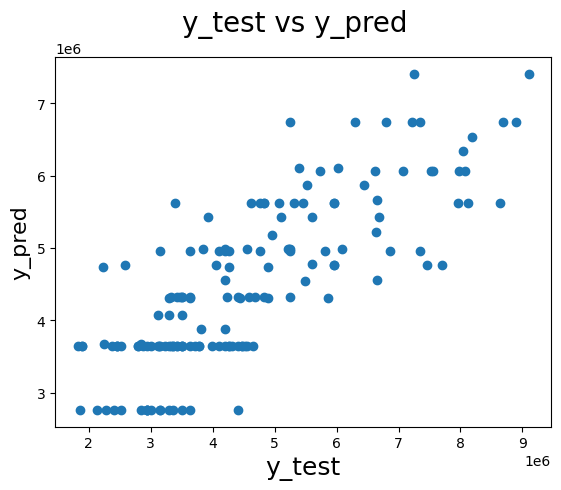

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label